In [4]:
%load_ext autoreload
%autoreload 2
import terra
import numpy as np
from domino.data.gqa import split_gqa, read_gqa_dps,DATASET_DIR
from domino.slices.gqa import collect_rare_slices, TASKS, build_rare_slice
from domino.train import synthetic_score_slices
import seaborn as sns
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
dps = read_gqa_dps(dataset_dir=DATASET_DIR)

In [7]:
from domino.slices.gqa import collect_rare_slices, TASKS
from domino.data.gqa import split_gqa, read_gqa_dps
slices_dp = collect_rare_slices(TASKS, num_frac=1, min_slice_frac=0.01, max_slice_frac=0.01)

task: collect_rare_slices, run_id=5641


In [ ]:
synthetic_score_slices(
    slices_dp=collect_rare_slices.out(5641), 
    split_dp=split_gqa.out(4681),
    synthetic_kwargs={"slice_pos_ab": (0.5, 1.5)},
    gqa_dps=dps
)

In [9]:
from domino.evaluate import evaluate_sdms, run_sdm
evaluate_dp = evaluate_sdms.out(run_id=5729, load=True)

In [10]:
from domino.evaluate import score_sdms
df = score_sdms(evaluate_dp)
df = df.dropna()

100%|██████████| 26/26 [00:13<00:00,  2.00it/s]


In [11]:
df.iloc[df.reset_index().groupby(["slice", "target"])['auroc'].idxmax().astype(int)]

,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,target,slice,run_sdm_run_id
0,0,0.744127,0.111111,0.333333,0.141414,0.222222,0.311111,0.466667,person,babies,5735
0,0,0.931940,0.111111,0.083333,0.090909,0.108696,0.195652,0.456522,vehicle,bike,5748
0,0,0.830436,0.111111,0.041667,0.060606,0.105263,0.157895,0.315789,vehicle,boat,5750
0,0,0.999344,1.000000,0.833333,0.232323,0.913043,1.000000,1.000000,farm_animal,cat,5740
0,0,0.973606,0.555556,0.541667,0.242424,0.545455,0.727273,0.818182,farm_animal,chicken,5745
0,0,0.662010,0.111111,0.041667,0.050505,0.047619,0.119048,0.119048,clothing,coat,5754
0,0,0.819571,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,farm_animal,cow,5742
0,0,0.818286,0.222222,0.125000,0.080808,0.102564,0.205128,0.256410,clothing,dress,5753
2,2,0.799833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,person,drinkers,5736
2,2,0.826281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,person,drivers,5737


In [15]:
dp = run_sdm.out(run_id=5740, load=True)

In [16]:
from domino.metrics import compute_sdm_metrics
compute_sdm_metrics(dp)

,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200
0,0,0.999344,1.0,0.833333,0.232323,0.913043,1.0,1.0
1,1,0.093332,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,2,0.788884,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,3,0.427867,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,4,0.744850,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [19]:
from domino.emb.clip import embed_words
from domino.explain import explain_slice
slice_idx= 0
words_dp = embed_words.out(5143).load()
expl_dp = explain_slice(slice_dp=dp, words_dp=words_dp.lz[:int(1e4)], slice_idx=slice_idx)
expl_dp.lz[(-expl_dp["score"]).argsort()[:10]]

,word (PandasSeriesColumn),score (NumpyArrayColumn),frequency (PandasSeriesColumn)
0,cat,7.406250,48970
1,sits,6.816406,32791
2,alley,5.816406,15871
3,cats,5.496094,26014
4,lounge,5.265625,14912
5,bengal,5.261719,48385
6,sox,5.210938,34420
7,midnight,4.921875,32327
8,wednesday,4.875000,29888
9,olive,4.871094,23122


,object_image (LambdaColumn),target (PandasSeriesColumn),slice (PandasSeriesColumn)
0,,1.0,1.0
1,,1.0,1.0
2,,1.0,1.0
3,,1.0,1.0
4,,1.0,1.0
...,...,...,...
15,,1.0,1.0
16,,1.0,1.0
17,,1.0,1.0
18,,1.0,1.0

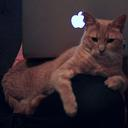
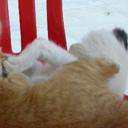
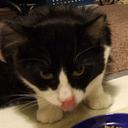
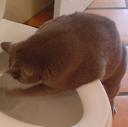
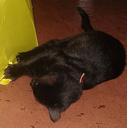
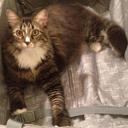
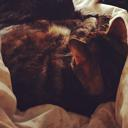
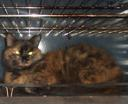
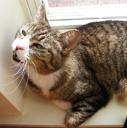
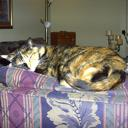

In [20]:
dp.lz[dp["slices"].data[:, slice_idx].argsort()[-20:]][["object_image", "target", "slice"]]

In [67]:
dp["slice"].sum()

47

In [59]:
from scipy.stats import rankdata

rankdata(dp["slices"].data[:, slice_idx]) < 100

array([False, False, False, ..., False, False, False])

In [59]:
sdm = SpotlightSDM()

In [60]:
inp = run_sdm.inp(run_id=5539)
data_dp = inp["data_dp"].load()
emb_dp = inp["emb_dp"].load()

In [61]:
data_dp = data_dp.lz[data_dp["split"].isin(["valid", "test"])].merge(
    emb_dp[["object_id", "emb"]], on="object_id"
)

In [80]:
sdm.fit(data_dp=data_dp.lz[data_dp["split"] == "valid"])

100%|██████████| 1000/1000 [00:02<00:00, 376.86it/s]


[array([0.00025375, 0.00022889, 0.00022561, ..., 0.00026515, 0.00020688,
        0.0002662 ], dtype=float32),
 array([0.00030053, 0.00031369, 0.000315  , ..., 0.00022544, 0.00024294,
        0.00022153], dtype=float32),
 array([0.00016677, 0.00019903, 0.00021215, ..., 0.000272  , 0.00024099,
        0.00032707], dtype=float32),
 array([0.00029512, 0.00026993, 0.00026774, ..., 0.00025754, 0.00023505,
        0.00021307], dtype=float32),
 array([0.00016554, 0.00022298, 0.00022927, ..., 0.00026485, 0.00025649,
        0.00032698], dtype=float32)]

In [85]:
slice_dp = sdm.transform(data_dp.lz[data_dp["split"] == "test"])

In [72]:
torch.tensor(data_dp["pred"])

tensor([0.0859, 0.0200, 0.6701,  ..., 0.5376, 0.8819, 0.9679],
       dtype=torch.float64)

In [74]:
torch.tensor(data_dp["target"]).to(float)

tensor([0., 0., 0.,  ..., 0., 1., 1.], dtype=torch.float64)